<a href="https://colab.research.google.com/github/diegoestradaXO/Lab6-Data-Science/blob/master/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 6: Analítica de redes sociales
## Autores
- Saúl Contreras 18409
- Andrea Elías 17048
- Diego Estrada 18540

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import tweepy
import csv
import pandas as pd
import string
import re
import emoji

---
## Prueba del API de Twitter con llaves de perfil de desarrollador


In [4]:
auth = tweepy.OAuthHandler('fxRDOaD9DYKj62uAwczglNevG', '0WSdq2MMgltglKb7eMxD7IyJGhT0POh9o4IuqUhPjPRLCYCYA5')
auth.set_access_token('3171113016-1zypbezJcLEyQlM5x9P05CI9EtvSwZYueIBgTH2', '6Q3H0DSqqODFvRFK5HQpDhxZWoaSV1X4P1t2rCRBxB6oG')

api = tweepy.API(auth, wait_on_rate_limit=True)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print (tweet.text)


#EUCoronavirus Durante la sesión ordinaria, el diputado Álvaro Arzú Escobar presentó una moción para que el estado… https://t.co/9dFCuO2rQL
Con gafas de sol porque el verdadero homenaje, conociéndole, fue ayer por la noche. 😂👏🏻 https://t.co/0D4rBIW3Us
1,000 kilos de cocaína fueron localizados en potrero baldío del caserío Toquela, Livingston, Izabal, 5 fusiles y má… https://t.co/84KVORSwVL
El clásico Brasil-Argentina quedó suspendido, anunció de la selección albiceleste en la red social Twitter, tras 30… https://t.co/ytqWfUoJMC
#AHORA Accidente de tránsito se registra en la Vía Alterna al Sur, en la incorporación de la ruta al Pacífico.

Vía… https://t.co/w34BoQBoit
Reportan accidente de tránsito en km 20 en la carretera VAS, varios vehículos involucrados en el percance. 
https://t.co/ssaEOOYUP7
Tres mujeres fueron #atacadas por un hombre que cargaba en brazos a su bebé. 
https://t.co/LYkOxDFqth
🚨 Suspenden #partido entre Brasil y Argentina por #intervenciónSanitaria
➡ https://t.co/cQM

- - -
## Descripción del problema
_Extraiga los datos relacionados con el coviden Guatemala, puede utilizar cualquier red social, a la que  se  tenga  acceso,  y  pueden  extraerse  datos  de  varias.  Por  ejemplo  si  extrae  datos  de  twitter podría utilizar el hashtag #COVID19gt o #CoronavirusGT. Explore los datos que extraiga y descubra conocimiento, tendencias y elementos interesantes._



### Extracción de datos

In [39]:
#Se crea el archivo csv, si ya existe, se escribe en él.
file = open('twitter_covid_gt.csv', 'a')

writer = csv.writer(file)
hashtags = ('#COVID19gt OR #CoronavirusGT OR #CuarentenaTotal OR #GuatemalaNoSeDetiene OR #Guatemala#COVID19 OR #CoronavirusGuatemala OR #QuedateEnCasaGT OR #COVID_19gt OR #Covid19gt OR #ToqueDeQuedaGT OR #PandemiaGT OR #DatosCovidGT OR #YoMeQuedoEnMiCasa OR #JuntosSaldremosAdelante')
for tweet in tweepy.Cursor(api.user_timeline,id='GuatemalaGob', lang="es").items():
    temporal = tweet.text
    #Limpieza de caracteres especiales
    temporal = temporal.replace('á', 'a')
    temporal = temporal.replace('é', 'e')
    temporal = temporal.replace('í', 'i')
    temporal = temporal.replace('ó', 'o')
    temporal = temporal.replace('ú', 'u')
    temporal = temporal.replace('Á', 'A')
    temporal = temporal.replace('É', 'E')
    temporal = temporal.replace('Í', 'I')
    temporal = temporal.replace('Ó', 'O')
    temporal = temporal.replace('Ú', 'U')
    temporal = temporal.replace('ñ', 'n')
    temporal = temporal.replace('Ñ', 'N')
    temporal = temporal.replace('Ü', 'U')
    temporal = temporal.replace('ü', 'u')
    writer.writerow([tweet.created_at, temporal.encode('utf-8')])

### Carga de datos

In [42]:
data = pd.read_csv('/content/twitter_covid_gt.csv')
data.columns = ["Date", "Tweet"]
len(data.columns)


2

### Limpieza y preprocesamiento

Se crean funciones para eliminar signos de puntuación, url's y números, pues no aportan valor al análisis que se quiere hacer.

In [43]:
def remove_characters(text):
  return text.translate(text.maketrans('', '', string.punctuation))

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def remove_num(text):
    return re.sub('^\d+\s|\s\d+\s|\s\d+$','',text)

Insalación de librería emoji

In [44]:
!pip install emoji

In [45]:
# Se quitan vacíos
data = data.dropna(subset=['Tweet'])

# Lowercasing
data['Tweet'] = data['Tweet'].apply(lambda line: str(line).lower())

# Se quitan signos de puntuación
data['Tweet'] = data['Tweet'].apply(lambda line: remove_characters(str(line)))

# Se quitan enlaces URL
data['Tweet'] = data['Tweet'].apply(lambda line: remove_url(str(line)))

# Se quitan los emojis
data['Tweet'] = data['Tweet'].apply(lambda line: emoji.demojize(str(line)))

# Se quitan números
data['Tweet'] = data['Tweet'].apply(lambda line: remove_num(str(line)))

A continuación se elminan las stopwords

In [46]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
stopwords = set(stopwords.words('spanish'))
expresiones = ['el','los','las','la','de','que','porque','de','por','lo','brt','object','deic',
               'bxc2xa1ojala','Name','bel','lenght','viern','dtype']
for i in expresiones:
    stopwords.add(i)
print(stopwords)

{'estuve', 'estabas', 'tienes', 'serían', 'a', 'soy', 'tened', 'object', 'habías', 'tendrías', 'habiendo', 'donde', 'estés', 'algo', 'tuvisteis', 'habida', 'tuviese', 'tenía', 'seamos', 'estaremos', 'ha', 'hasta', 'estuviera', 'hayáis', 'hubieses', 'estaré', 'otras', 'habidos', 'tendrás', 'esa', 'ya', 'estarán', 'me', 'estada', 'eso', 'tengan', 'suyas', 'estuviste', 'estuvierais', 'cual', 'dtype', 'hay', 'e', 'hubiesen', 'brt', 'habrás', 'sentidas', 'has', 'habré', 'hubieran', 'estará', 'estoy', 'fuimos', 'habrían', 'tuyo', 'estás', 'con', 'contra', 'seríamos', 'vosotros', 'fuéramos', 'tengamos', 'estén', 'el', 'para', 'estaba', 'sentid', 'se', 'tienen', 'fuisteis', 'están', 'nuestro', 'unos', 'tuvimos', 'sería', 'lenght', 'no', 'habían', 'nuestra', 'nos', 'vuestras', 'muchos', 'fuerais', 'tenemos', 'estado', 'son', 'seríais', 'hubiste', 'al', 'tengas', 'eres', 'pero', 'tengáis', 'hemos', 'habíais', 'tendremos', 'tendrán', 'fueses', 'tenida', 'mucho', 'estuviéramos', 'estaríais', 'esta

Se observan los primeros 10 twits en el dataset y efectivamente han pasado por la limpieza y preprocesamiento. Los datos están listos para el análisis y aplicación de algoritmos.

In [48]:
data.head(10)

,Date,Tweet
0,2021-09-05 02:14:40,bendirecto presidente drgiammattei participa ...
1,2021-09-05 02:06:39,bendirecto vecinos de martires del pueblo son...
2,2021-09-05 01:49:46,bcontinua la jornada movil de vacunacion en el...
3,2021-09-05 01:07:39,brt scspgt presidente drgiammattei esta vacuna...
4,2021-09-05 00:34:46,bendirecto declaraciones del presidente drgia...
5,2021-09-05 00:10:14,bendirecto declaraciones del presidente drgia...
6,2021-09-04 23:23:35,bendirecto presidente drgiammattei supervisa ...
7,2021-09-04 18:01:38,bendirecto el plan de vacunacion contra el co...
8,2021-09-04 02:53:20,bendirecto vecinos de villa nueva son atendid...
9,2021-09-04 02:20:20,bendirecto inicia funcionamiento de la brigad...


### Análisis exploratorio

Con el fin de ver de manera más atractiva las palabras más frecuentes en el conjunto de datos, se realiza una nube de palabras. Se observa que las más frecuentes son: drgiammatei, presidente, participa, en directo, vacuna, jornada, en vivo, entre otras.

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

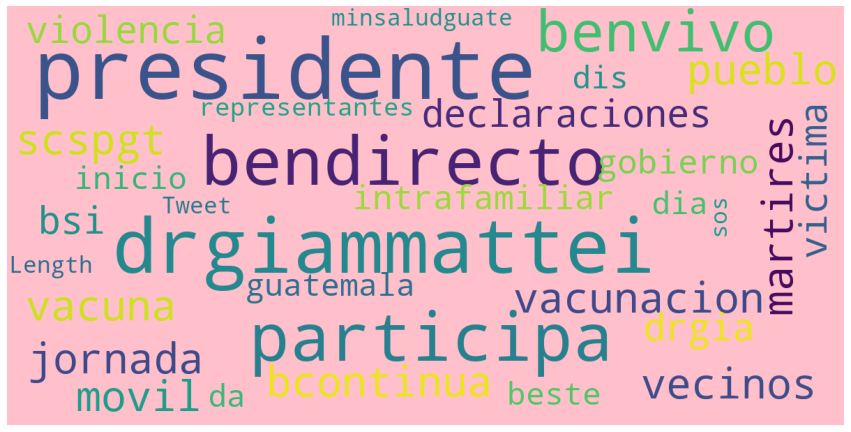

In [53]:
wordcloud = WordCloud(
        background_color='pink',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(data['Tweet']))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

También se utiliza la librería Counter para obtener la suma de las palabras más frecuentes en los twits del conjunto de datos.

In [54]:
from collections import Counter

In [55]:
tweet_count = Counter()

In [56]:
splitted_tweets = []
for tweet in data['Tweet']:
    word_list = []
    for word in tweet.split():
        if word not in stopwords:
            word_list.append(word)
    splitted_tweets.append(' '.join(word_list))

In [57]:
for tweet in splitted_tweets:
    tweet_count.update(word.strip('.,?!"').lower() for word in tweet.split())

Justo como se observó en la nube de palabras, *drgiammatei*, haciendo referencia al presidente de Guatamala, es la palabra más frecuente. Seguido de ella se encuentra *presidente, guatemala, endirecto, mas, gobierno, nacional y covid19*.

In [58]:
tweet_count.most_common(20)

[('drgiammattei', 620),
 ('presidente', 427),
 ('guatemala', 410),
 ('bendirecto', 393),
 ('mas', 239),
 ('gobierno', 236),
 ('nacional', 232),
 ('covid19', 225),
 ('binformenacional', 218),
 ('vacunacion', 195),
 ('minecogt', 177),
 ('hoy', 129),
 ('minsaludguate', 124),
 ('conferencia', 110),
 ('vacunas', 109),
 ('participa', 107),
 ('scspgt', 96),
 ('prensa', 96),
 ('pais', 93),
 ('reunion', 92)]

A continuación se realiza una gráfica de barras para verlo de otra forma.

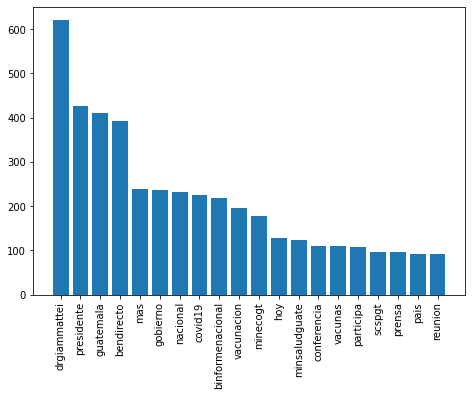

In [59]:
datos_tweet = tweet_count.most_common(20)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_tweet]
y_axis = [i[1] for i in datos_tweet]
ax.bar(x_axis,y_axis)
plt.xticks(rotation=90)
plt.show()